# Morphing Emojis

In [1]:
from controllable_nca.experiments.morphing_image.trainer import MorphingImageNCATrainer
from controllable_nca.experiments.morphing_image.emoji_dataset import EmojiDataset
from controllable_nca.nca import ControllableNCA

import torch

In [2]:
dataset = EmojiDataset(image_size=48, thumbnail_size=40)

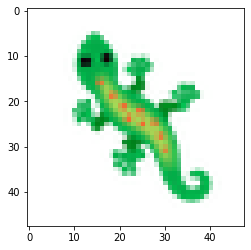

In [3]:
dataset.visualize(0)

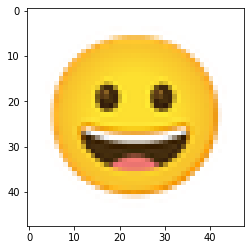

In [4]:
dataset.visualize(1)

### Make NCA

In [5]:
NUM_HIDDEN_CHANNELS = 16

nca =  ControllableNCA(num_goals=dataset.num_goals(), use_image_encoder=False,target_shape=dataset.target_size(), living_channel_dim=3, num_hidden_channels=NUM_HIDDEN_CHANNELS, cell_fire_rate=1.0)

In [6]:
device = torch.device('cuda')
nca = nca.to(device)
dataset.to(device)

In [7]:
trainer = MorphingImageNCATrainer(nca, dataset, nca_steps=[48, 64], lr=1e-4, num_damaged=0, damage_radius=3, device=device, pool_size=256)

Writing to tensorboard_logs/2022-02-21 13:50:21.539062


In [8]:
nca

ControllableNCA(
  (perception_net): Conv2d(21, 63, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=21, bias=False)
  (update_net): UpdateNet(
    (out): Sequential(
      (0): Conv2d(63, 128, kernel_size=(1, 1), stride=(1, 1))
      (1): ReLU()
      (2): Conv2d(128, 21, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
  )
  (encoder): Encoder(
    (embedding): Embedding(10, 32)
    (encoder): Sequential(
      (0): Linear(in_features=32, out_features=32, bias=True)
      (1): ReLU()
      (2): Linear(in_features=32, out_features=16, bias=False)
    )
  )
)

In [ ]:
trainer.train(batch_size=5, epochs=100000)

loss:0.0873592421412468--log10loss:-1.0586911422137681--perception_net.weight_gr

In [10]:
from controllable_nca.experiments.morphing_image.visualizer import MorphingImageVisualizer

In [11]:
# nca.load("saved_models/morphing_50k.pt")

In [11]:
viz = MorphingImageVisualizer(trainer, 64)

In [12]:
viz.visualize()

Canvas(height=320, width=320)